


# TRABAJO PRACTICO - 3: GRUPO 8 

Autores:
- Choconi Lucas
- Berra Eliel 
- Mina Federico
- Scillato German



### Se realizan las importaciones necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
!pip install mixed-naive-bayes
from mixed_naive_bayes import MixedNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

Tomamos el dataset de https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Debajo se describe el dataset y los atributos.

## Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [3]:
data_location = "Datasets\heart.csv"
data = pd.read_csv(data_location)
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
- Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

### Observamos la distribución inicial de los datos

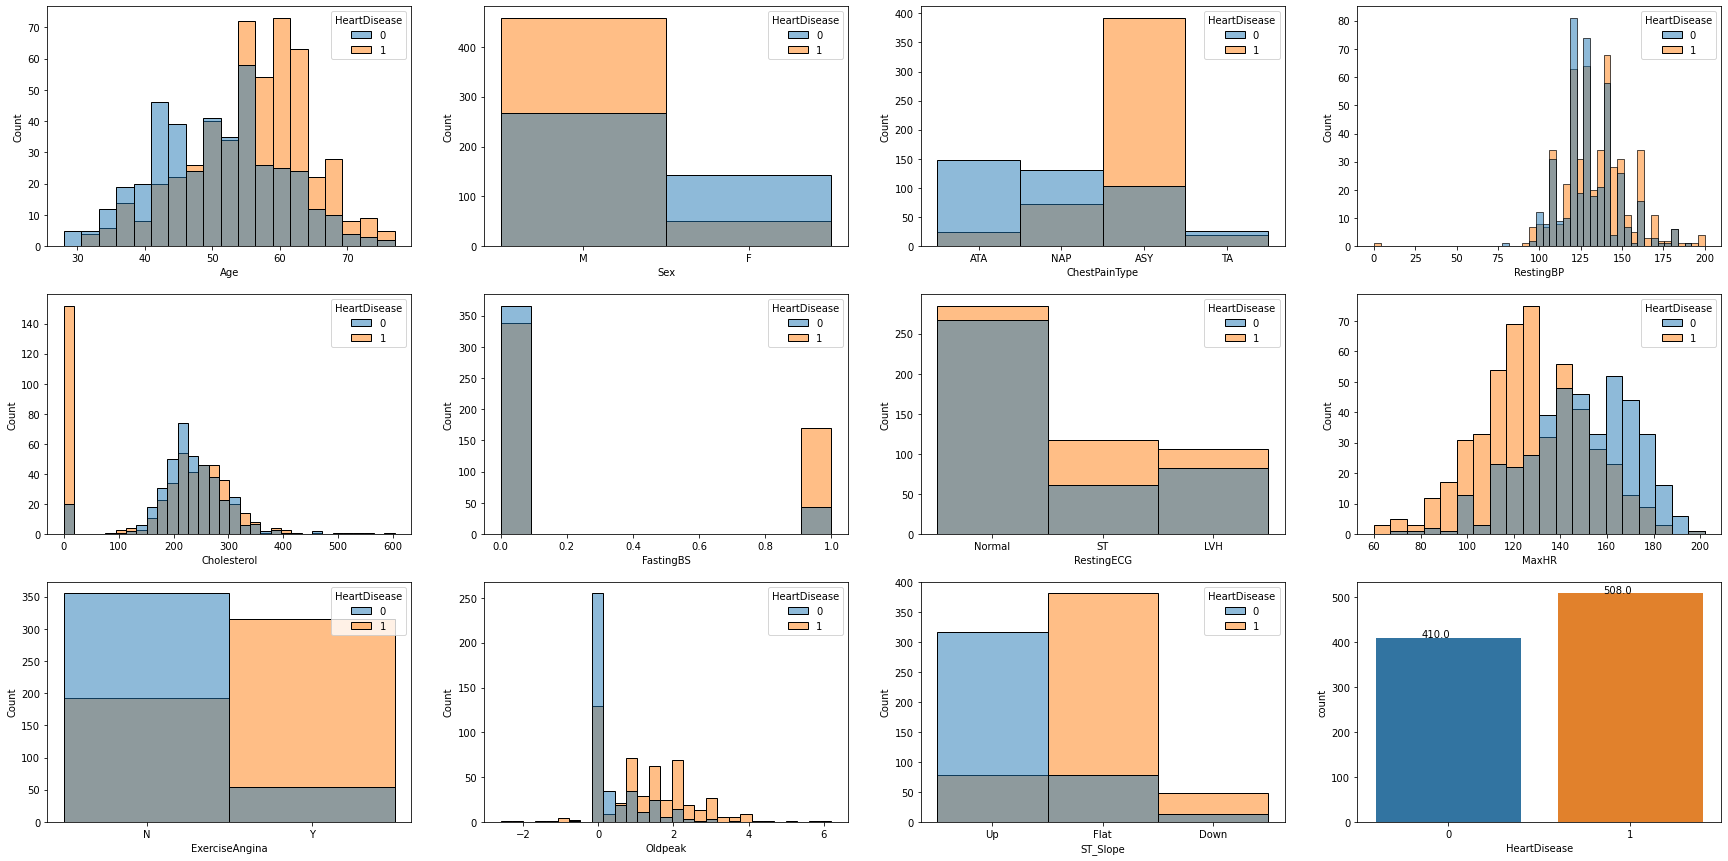

In [4]:
### Observamos la distribución inicial de los datos

fig, axs = plt.subplots(3, 4,figsize=(30,15))


sns.histplot(data=data, x="Age", hue="HeartDisease", ax=axs[0,0])
sns.histplot(data=data, x="Sex", hue="HeartDisease", ax=axs[0,1])
sns.histplot(data=data, x="ChestPainType", hue="HeartDisease", ax=axs[0,2])
sns.histplot(data=data, x="RestingBP", hue="HeartDisease", ax=axs[0,3])
sns.histplot(data=data, x="Cholesterol", hue="HeartDisease", ax=axs[1,0])
sns.histplot(data=data, x="FastingBS", hue="HeartDisease", ax=axs[1,1])
sns.histplot(data=data, x="RestingECG", hue="HeartDisease", ax=axs[1,2])
sns.histplot(data=data, x="MaxHR", hue="HeartDisease", ax=axs[1,3])
sns.histplot(data=data, x="ExerciseAngina", hue="HeartDisease", ax=axs[2,0])
sns.histplot(data=data, x="Oldpeak", hue="HeartDisease", ax=axs[2,1])
sns.histplot(data=data, x="ST_Slope", hue="HeartDisease", ax=axs[2,2])
sns.countplot(data=data, x="HeartDisease", ax=axs[2,3])

for p in axs[2,3].patches:
       axs[2,3].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
                                                 

Analizamos las entradas con colesterol en 0 y las eliminamos ya que esos valores son fisiológicamente imposibles.

In [5]:
data[data.Cholesterol==0].HeartDisease.value_counts()

1    152
0     20
Name: HeartDisease, dtype: int64

In [6]:
data = data[data.Cholesterol!=0]

### Volvemos a observar la distribución de los datos.

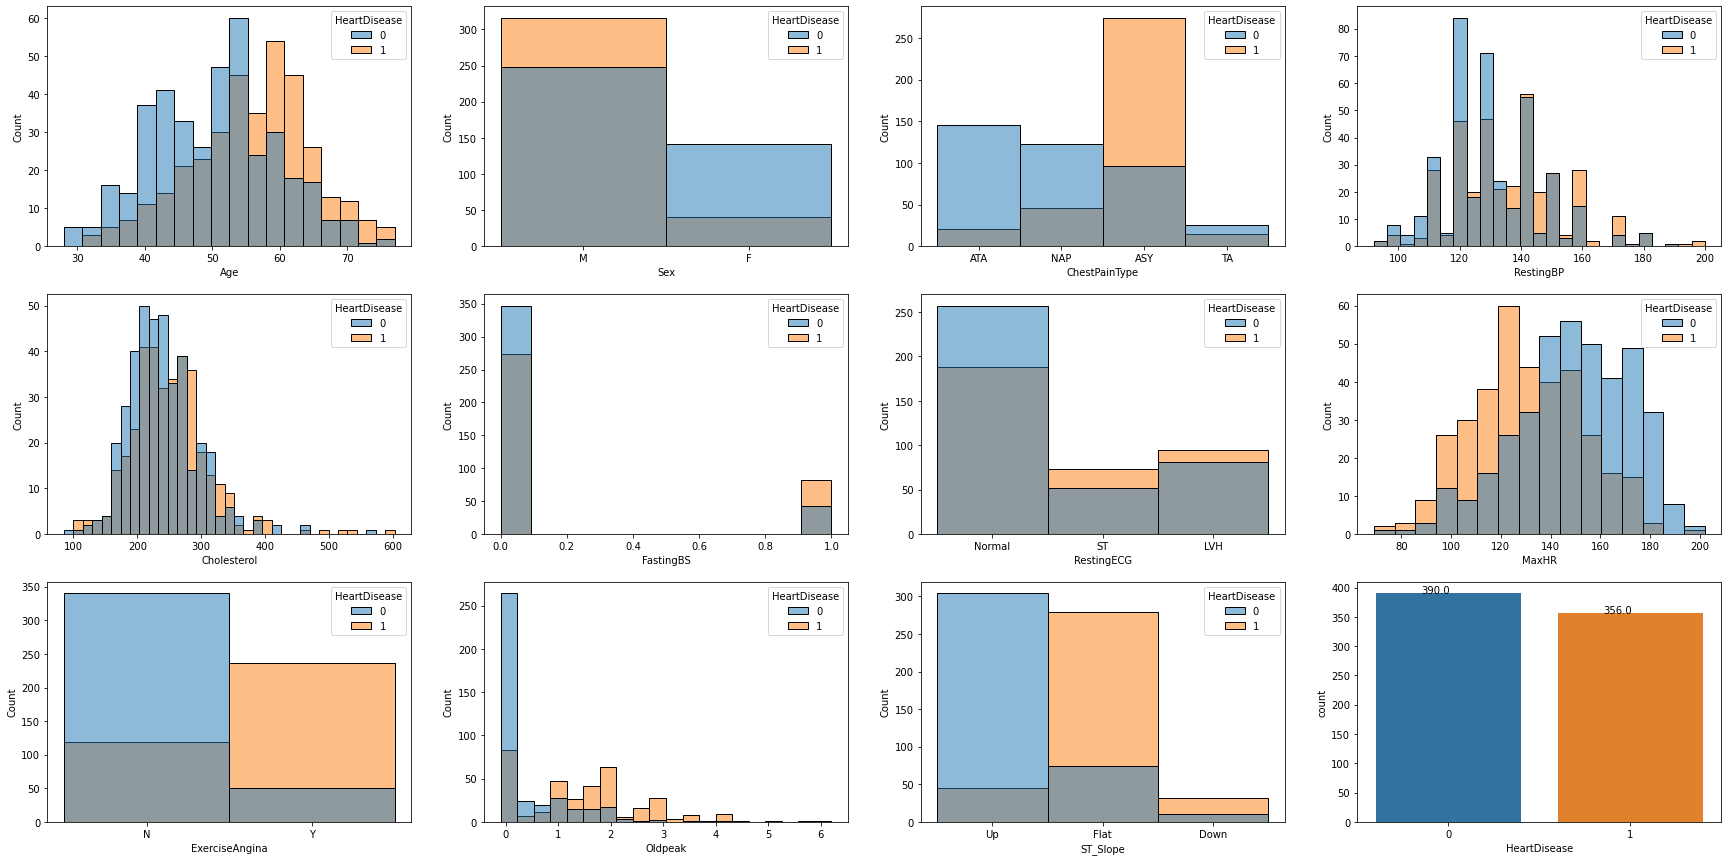

In [7]:
fig, axs = plt.subplots(3, 4,figsize=(30,15))

sns.histplot(data=data, x="Age", hue="HeartDisease", ax=axs[0,0])
sns.histplot(data=data, x="Sex", hue="HeartDisease", ax=axs[0,1])
sns.histplot(data=data, x="ChestPainType", hue="HeartDisease", ax=axs[0,2])
sns.histplot(data=data, x="RestingBP", hue="HeartDisease", ax=axs[0,3])
sns.histplot(data=data, x="Cholesterol", hue="HeartDisease", ax=axs[1,0])
sns.histplot(data=data, x="FastingBS", hue="HeartDisease", ax=axs[1,1])
sns.histplot(data=data, x="RestingECG", hue="HeartDisease", ax=axs[1,2])
sns.histplot(data=data, x="MaxHR", hue="HeartDisease", ax=axs[1,3])
sns.histplot(data=data, x="ExerciseAngina", hue="HeartDisease", ax=axs[2,0])
sns.histplot(data=data, x="Oldpeak", hue="HeartDisease", ax=axs[2,1])
sns.histplot(data=data, x="ST_Slope", hue="HeartDisease", ax=axs[2,2])
sns.countplot(data=data, x="HeartDisease", ax=axs[2,3])

for p in axs[2,3].patches:
       axs[2,3].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

## Creamos las variables dummies

In [8]:
data = pd.get_dummies(data, drop_first=True)

In [9]:
data.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0


## Se define variable target (HeartDisease) y features

In [10]:
X = data.drop(columns=['HeartDisease'])
y = data.HeartDisease

In [11]:
round(y.value_counts(normalize=True), 2)

0    0.52
1    0.48
Name: HeartDisease, dtype: float64

La hipotesis nula seria el valor con mayor porcentaje de la muestra, en nuestro caso es 0 (que implica que no haya evento cardíaco), y obtuvo un valor de %52. Además, observamos que la variable target está bien segmentada.

## Estandarizamos las variables numéricas

In [12]:
scaler=StandardScaler()

X_sc=scaler.fit_transform(X)

## Separamos el dataset de entrenamiento.

In [17]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y , random_state=15)

## Creamos un modelo Gaussiano de Naive Bayes para probar inicialmente.

In [18]:
model = GaussianNB()
model.fit(X_sc_train, y_train)

GaussianNB()

In [19]:
y_pred = model.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

Accuracy: 0.81
Recall: 0.88


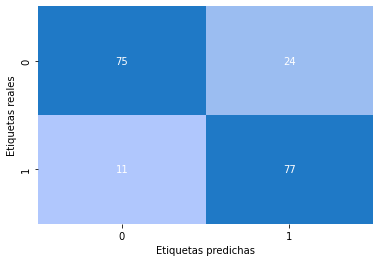

In [20]:
myColors = ((0.15, 0.40, 0.99, 0.36), (0.15, 0.60, 0.50, 0.8), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', myColors,10)

cm = confusion_matrix(y_test, y_pred)
axis_labels = np.sort(y.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Vamos a probar un modelo mixto de Naive Bayes para evaluar si obtenemos mejores métricas

In [21]:
# Como el modelo mixto utiliza variables categóricas vamos a utilizar las features sin estandarizar
X_not_sc_train, X_not_sc_test, y_not_sc_train, y_not_sc_test = train_test_split(X, y, random_state=10)

In [22]:
# Generamos los índices de las columnas categóricas para especificarlas como argumento en el modelo
i_categorical_cols = [i for i, col in enumerate(X_not_sc_train.columns) \
                      if len(np.unique(X_not_sc_train[col])) == 2]
naive_mixed = MixedNB(categorical_features = i_categorical_cols)
naive_mixed.fit(X_not_sc_train, y_not_sc_train)
y_pred = naive_mixed.predict(X_not_sc_test)
print("Accuracy:", accuracy_score(y_not_sc_test, y_pred).round(2))
print("Recall:", round(recall_score(y_not_sc_test, y_pred), 2))

[2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.88
Recall: 0.91


Text(0.5, 15.0, 'Etiquetas predichas')

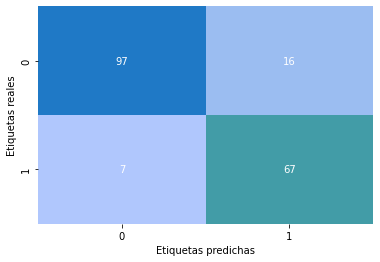

In [23]:
cm = confusion_matrix(y_not_sc_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

Las métricas del modelo Mixto dan mejores pero probaremos con otros modelos para validar la performance.

## El siguiente a aplicar sera KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)

In [25]:
# Ajustamos a los datos de entrenamiento.
knn.fit(X_sc_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

Accuracy: 0.84
Recall: 0.88


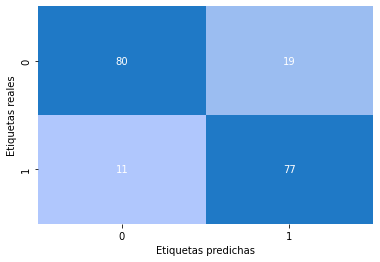

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Por último probaremos con Regresion logistica.

In [27]:
logistic_regression = LogisticRegression(penalty='none') # sin regularización
logistic_regression.fit(X_sc_train, y_train);
y_pred = logistic_regression.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

Accuracy: 0.82
Recall: 0.86


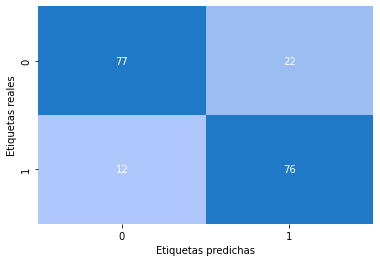

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Comparamos con el modelo regularizado con Lasso

Accuracy: 0.82
Recall: 0.86


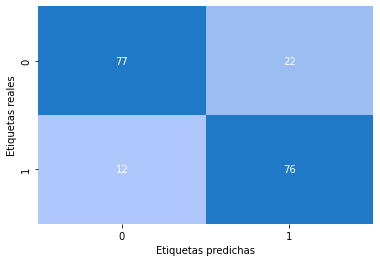

In [29]:
logistic_regression = LogisticRegression(penalty='l2') 
logistic_regression.fit(X_sc_train, y_train);
y_pred = logistic_regression.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Observamos que los resultados regularizados y no regularizados son prácticamente iguales.

### Como el que mejor resultados preliminares dio fue Naive Mixto decidimos avanzar con KNN realizando GridSearch y CV para ver si podemos superar a Naives 

### El objetivo principal es reducir los falsos negativos, porque se trata de una enfermedad cardiaca, por lo tanto nos centraremos en obtener el mejor recall posible.

In [30]:
folds=StratifiedKFold(n_splits=5, shuffle=True) 
k_range = list(range(1, 15))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [31]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='recall')
grid.fit(X_sc_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [32]:
print(grid.best_score_)
print(grid.best_params_)

0.8917540181691125
{'n_neighbors': 7, 'weights': 'distance'}


In [33]:
y_pred = grid.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

Accuracy: 0.84
Recall: 0.88


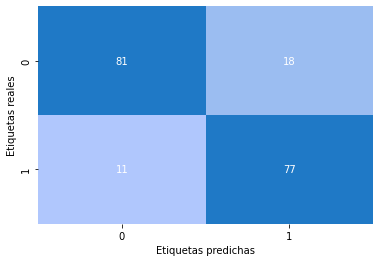

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Visualizaremos la curva ROC para evaluar la performance del modelo de Naive Mixto

In [35]:
y_pred_proba = naive_mixed.predict_proba(X_not_sc_test)

In [36]:
fpr_log,tpr_log,thr_log = roc_curve(y_not_sc_test, y_pred_proba[:,1])

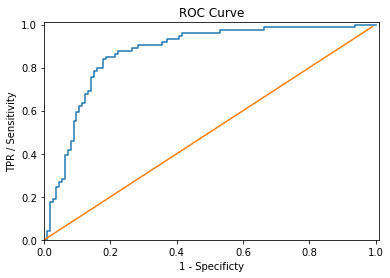

In [37]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [38]:
y_pred_grid = naive_mixed.predict(X_not_sc_test)
print(classification_report(y_not_sc_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       113
           1       0.81      0.91      0.85        74

    accuracy                           0.88       187
   macro avg       0.87      0.88      0.87       187
weighted avg       0.88      0.88      0.88       187



<AxesSubplot:>

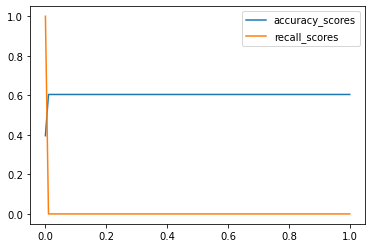

In [39]:
accuracy_scores = []
recall_scores = []

for i in np.linspace(0,1,100).tolist():
    y_pred_low_ths = (y_pred_proba[:, 1] > i).astype(int)
    ac = accuracy_score(y_not_sc_test, y_pred_low_ths)
    accuracy_scores.append(ac)
    rc = recall_score(y_not_sc_test, y_pred_low_ths)
    recall_scores.append(rc)
    
df_scores = pd.DataFrame({'accuracy_scores': accuracy_scores, 'recall_scores':recall_scores}, index=np.linspace(0,1,100).tolist())

df_scores.plot()

## Buscamos el mejor umbral con el mayor recall y dentro de este el mejor accuracy

In [40]:
df_scores_filter = df_scores[(df_scores.index<0.2) & (df_scores.index>0.1)]
df_scores_filter = df_scores_filter[df_scores_filter.recall_scores==max(recall_scores)]
best_ths = df_scores_filter.tail(1).index[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
y_pred_low_ths = (y_pred_proba[:, 1] > best_ths).astype(int)

In [ ]:
cm = confusion_matrix(y_not_sc_test, y_pred_low_ths)
print("Accuracy:", accuracy_score(y_not_sc_test, y_pred_low_ths).round(2))
print("Recall:", round(recall_score(y_not_sc_test, y_pred_low_ths), 2))
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [ ]:
print( f' Se concluye que el mejor umbral para decidir es el del {round(best_ths*100,0)}%')